In [22]:
# Standard imports
import cv2
import numpy as np;
 
import matplotlib.pyplot as plt
cv2.useOptimized()
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 12)
dbgImgProcSteps=False
import time
import os
 

Populating the interactive namespace from numpy and matplotlib


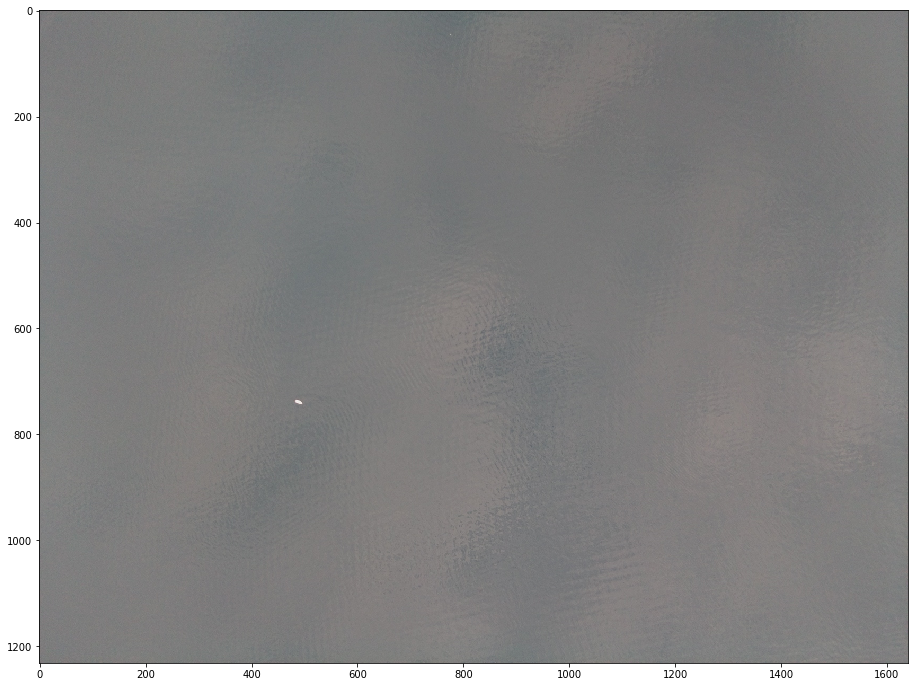

img_hsv_h


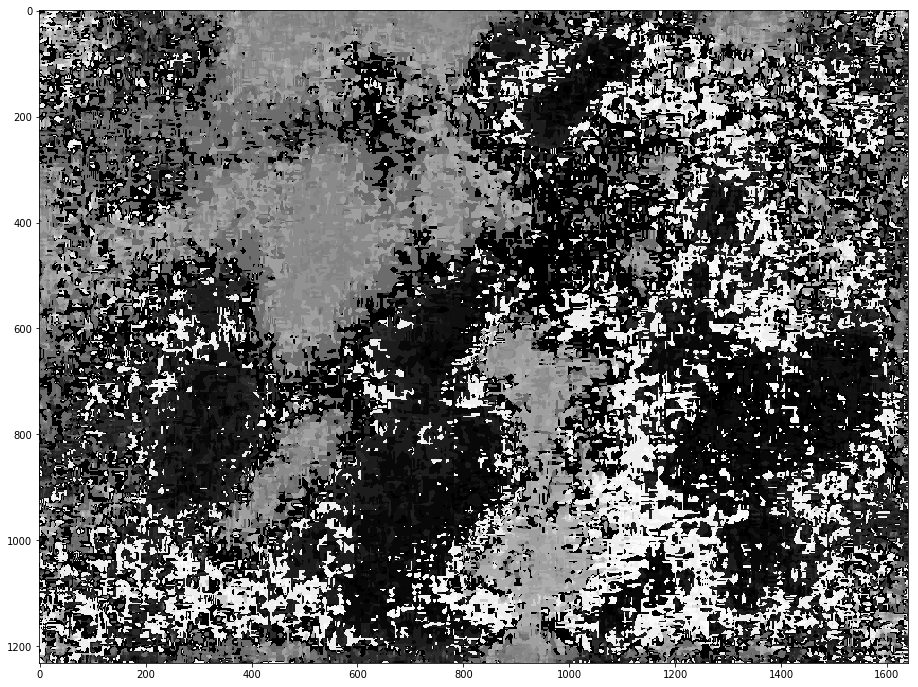

img_hsv_s


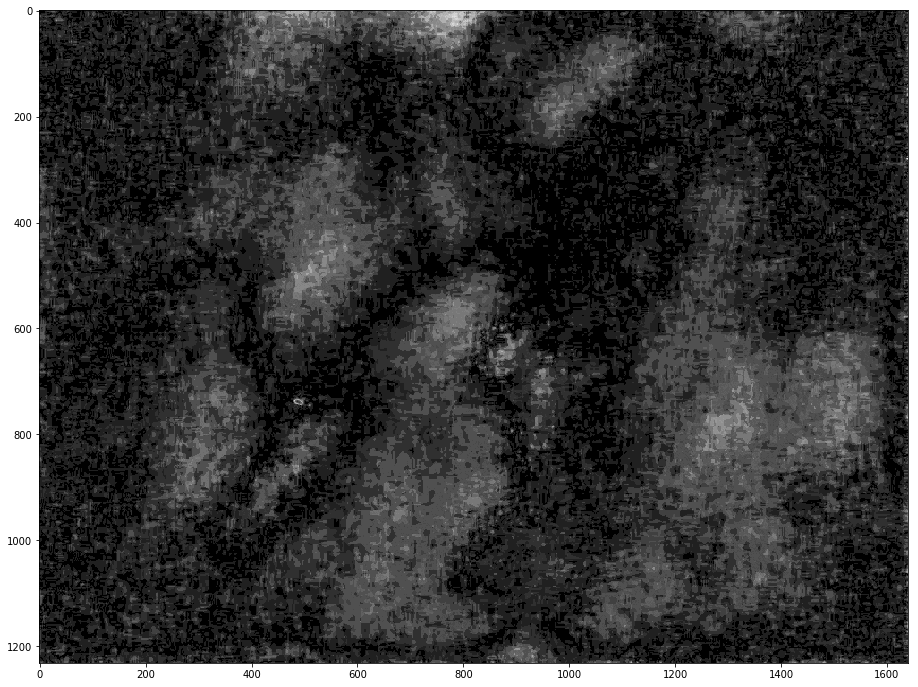

img_hsv_v


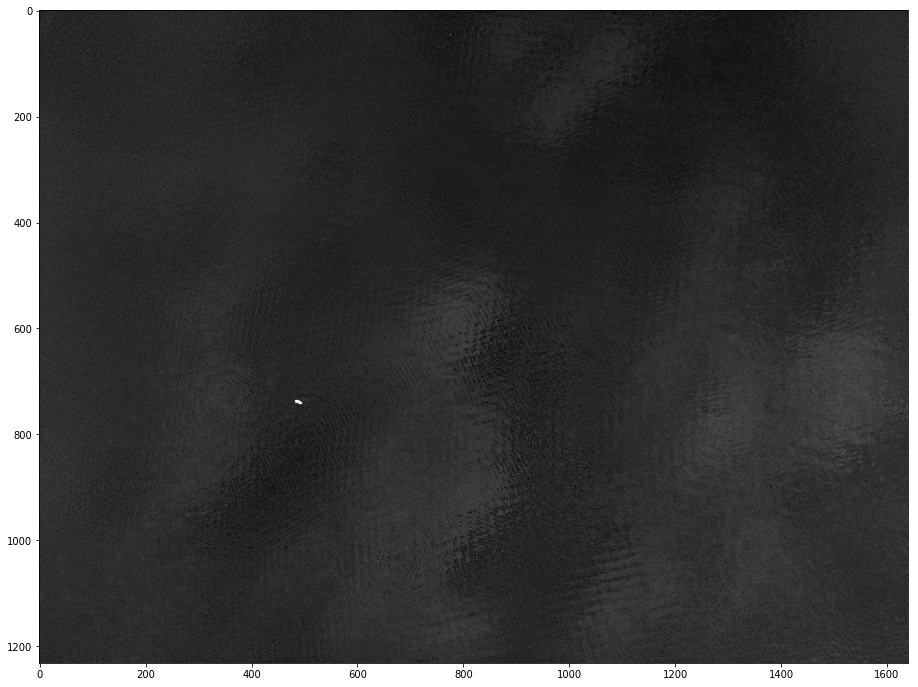

gradients_a


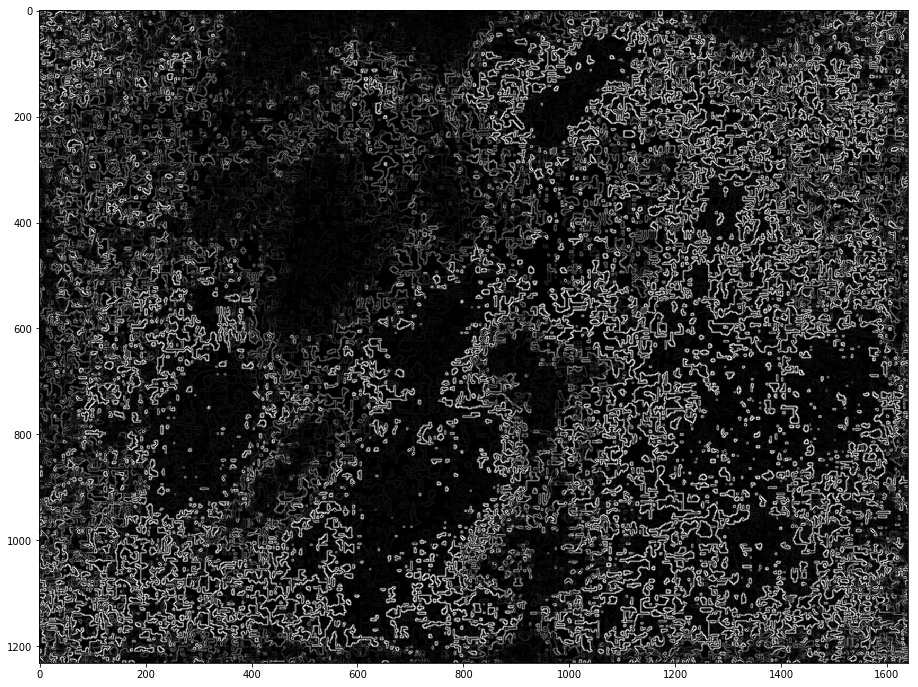

gradients_a_weighted


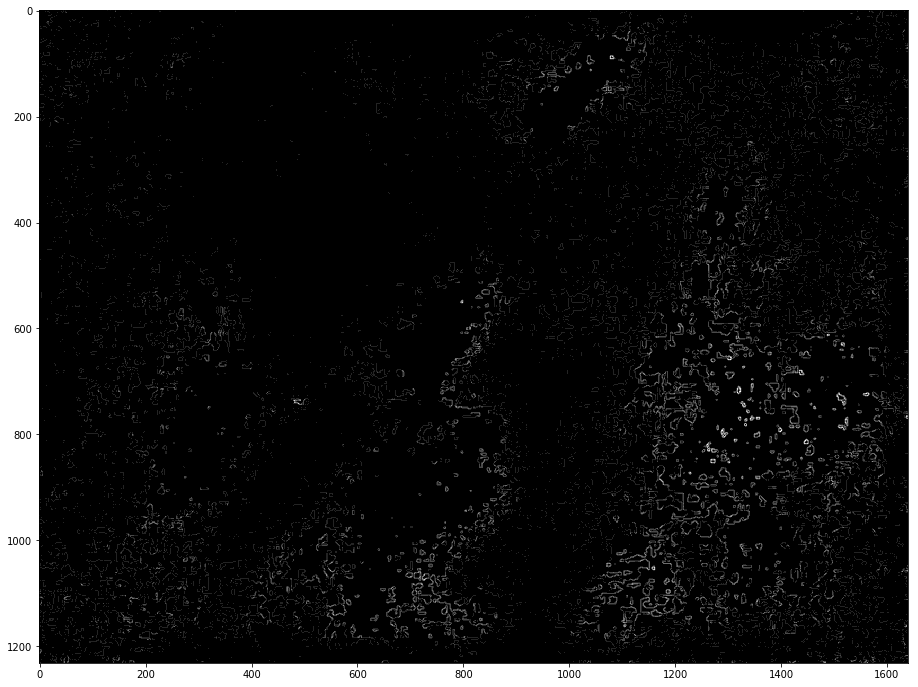

gradients_b


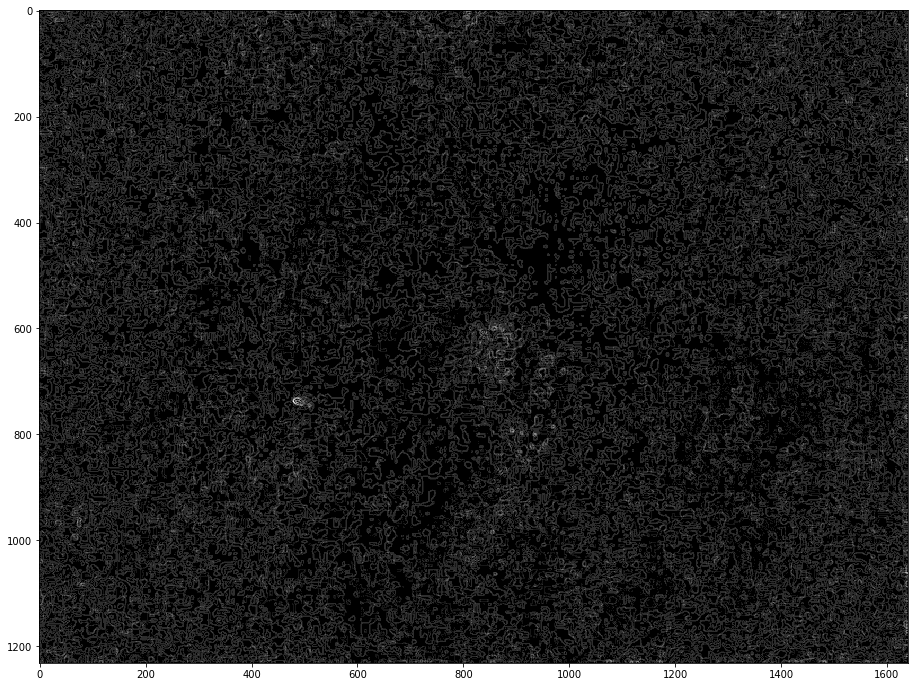

gradients_c


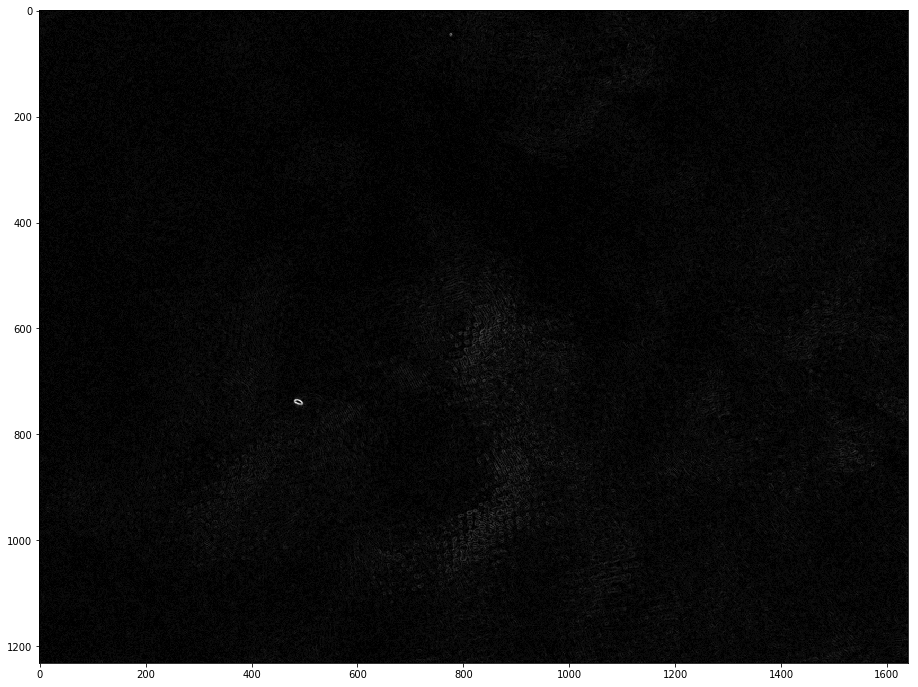

gradients_combined


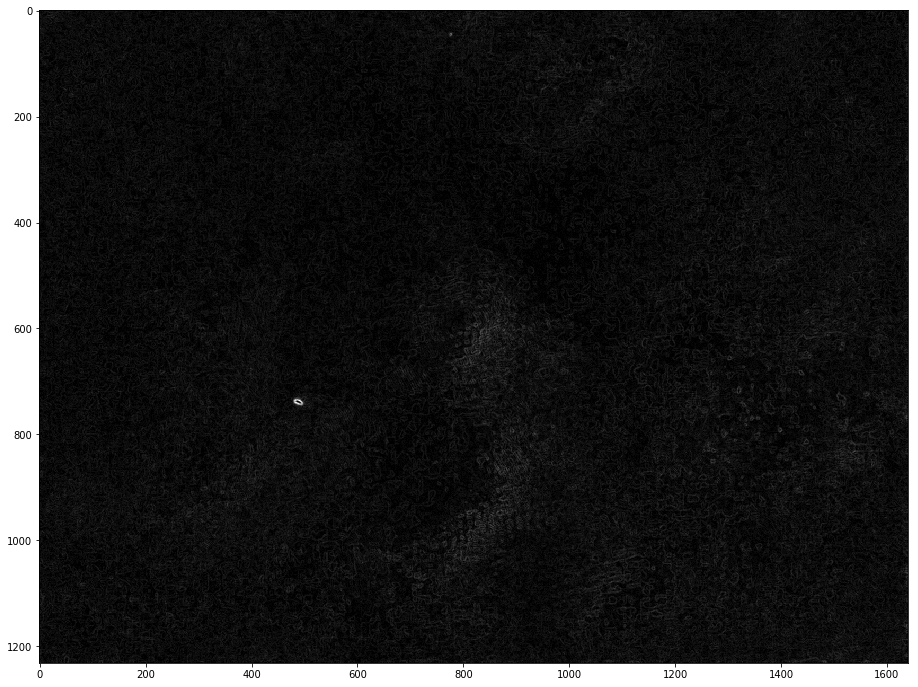

grad_threshed


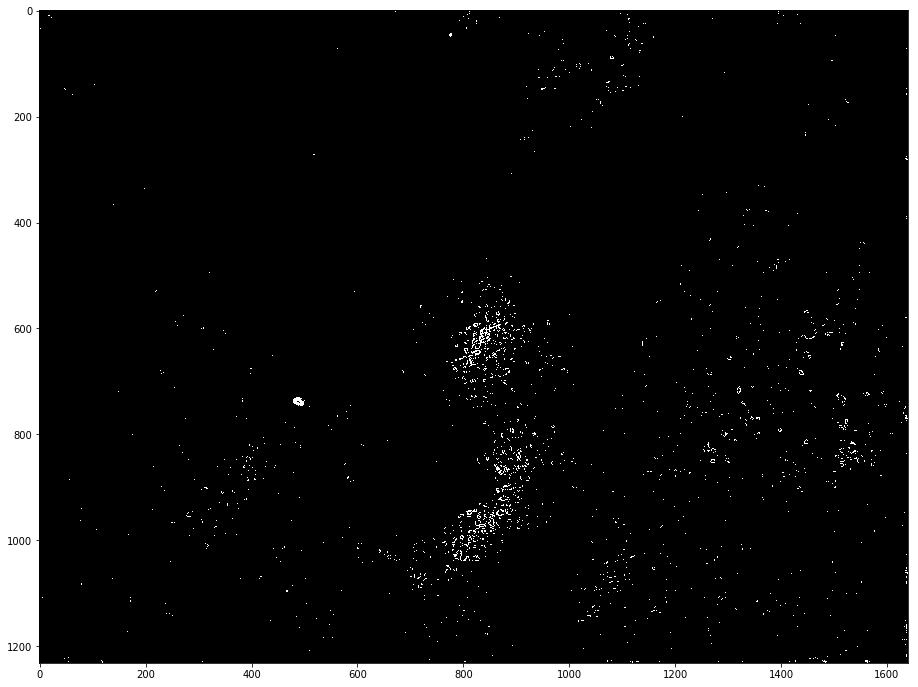

img_morph_opened


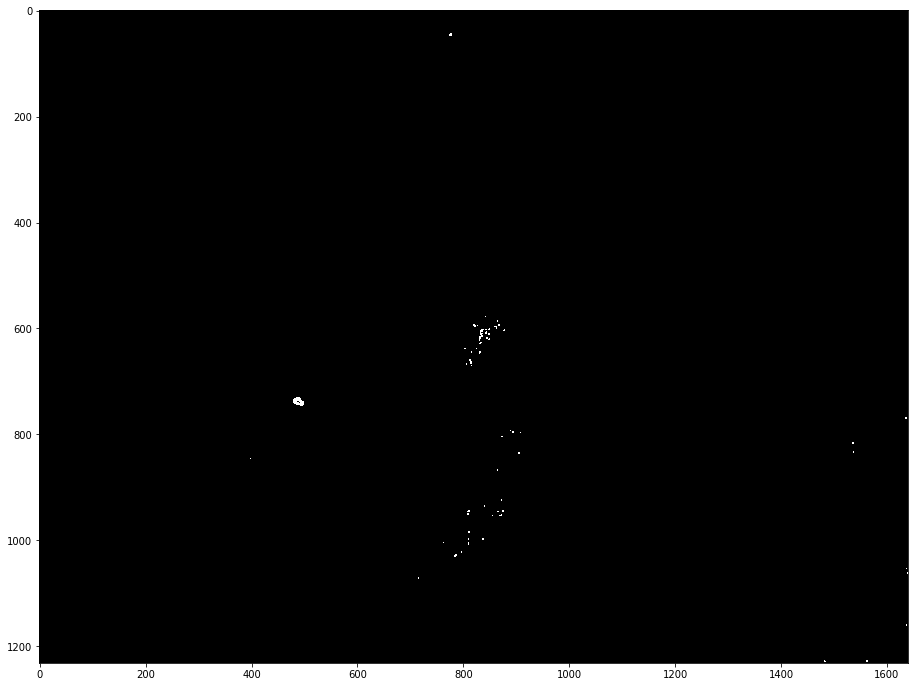

img_dilated


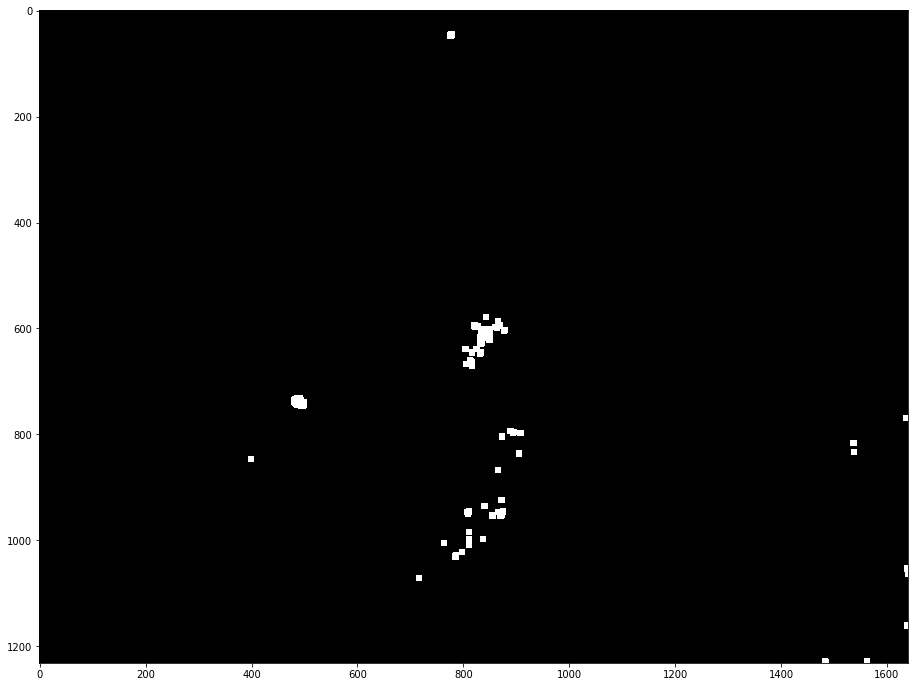

boundingBoxes


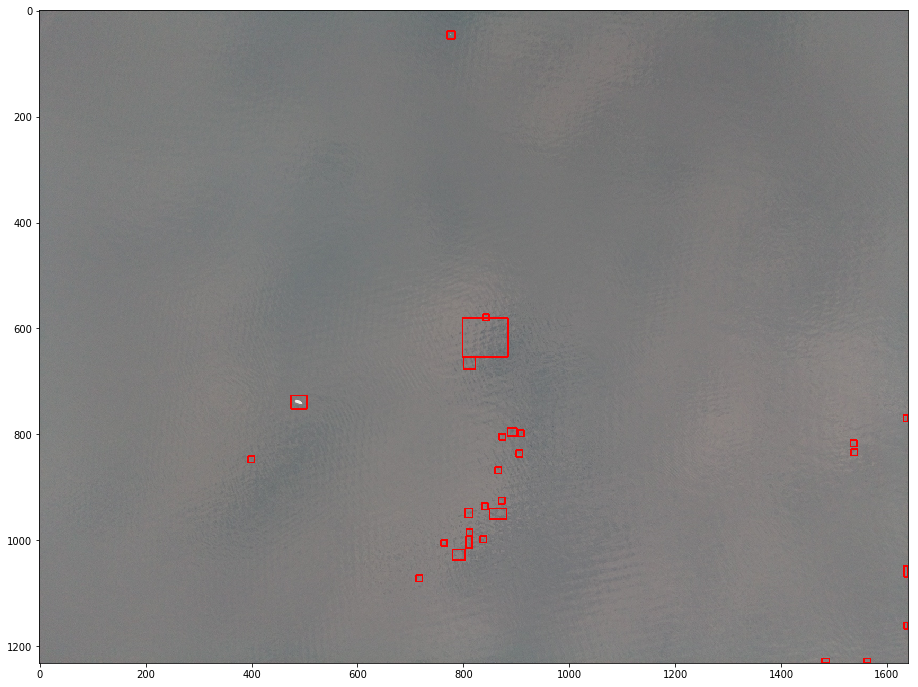

'\nimport nbimporter\nimport extractFeatures as roiDescriptor\nbbGroundTruthPath=os.path.splitext(onePicPath)[0]+".xml"\nbbBoatGT=roiDescriptor.getBoatROIsFromFile(bbGroundTruthPath)\n\nret=testDetectionIoUPerf(boundingBoxes,bbBoatGT,img_hsv.shape)\n'

In [74]:
import roiDetector

#show_step=["split_pic","Add_Pics", "calc_grad_pic", "gauss_blur_pic","morph_pic","denoise_pic","percentile_threshold_Pic","getBoundingBoxesFromContours"]
show_step=["calc_grad_pic","gauss_blur_pic","percentile_threshold_Pic","getBoundingBoxesFromContours","morph_pic"]
dbgImgProcSteps=True

#onePicPath= "/home/julle/ControlerProjekte/SearchWing/Data/images/Moonbird/MoonbirdDatasetSmaller/_AM_8627.JPG"
onePicPath= "/home/julle/ControlerProjekte/SearchWing/Data/images/BodenSeeFlugHerbst2018/picshalf/2018-02-13T16:00:48.230245.pg"
#onePicPath ="/home/julle/ControlerProjekte/SearchWing/Data/images/BodenSeeFlugHerbst2018/Lw8rj.jpg"

onePic=roiDetector.load_pic(onePicPath)
plt.imshow(onePic,cmap="gray")
plt.show()  

img_hsv = cv2.cvtColor(onePic, cv2.COLOR_RGB2HSV)
img_hsv_h,img_hsv_s,img_hsv_v=roiDetector.split_pic(img_hsv)

print("img_hsv_h")
plt.imshow(img_hsv_h,cmap="gray")
plt.show()
print("img_hsv_s")
plt.imshow(img_hsv_s,cmap="gray")
plt.show()
print("img_hsv_v")
plt.imshow(img_hsv_v,cmap="gray")
plt.show()

#img_hsv_h=hweighted
#process
gradMode = "sobel"
gradients_a = roiDetector.imgProcess2Gradients(img_hsv_h, 179, gradMode=gradMode, gradSize=gradSize,
                                   gaussKernelSize=gaussBlurKernelSize, gausssigmaSize=0)
gradients_b = roiDetector.imgProcess2Gradients(img_hsv_s, 255, gradMode=gradMode, gradSize=gradSize,
                                   gaussKernelSize=gaussBlurKernelSize, gausssigmaSize=0)
gradients_c = roiDetector.imgProcess2Gradients(img_hsv_v, 255, gradMode=gradMode, gradSize=gradSize,
                                   gaussKernelSize=gaussBlurKernelSize, gausssigmaSize=0)

gradients_a_weighted = np.uint8(gradients_a*(img_hsv_s*(1.0/255)))

gradients_combined_1 = roiDetector.Add_Pics(gradients_a_weighted, gradients_b)
gradients_combined_2 = roiDetector.Add_Pics(gradients_combined_1, gradients_c)

grad_threshed = roiDetector.percentile_threshold_Pic(gradients_combined_2, 99)
# img_threshed_denoised = denoise_pic(img_threshed,kernelsize=2,iterations=1)
img_morph_opened = roiDetector.morph_pic(grad_threshed, 3, cv2.MORPH_OPEN)  # openSize=2
img_dilated = roiDetector.dilate_pic(img_morph_opened, 10)
contours = roiDetector.getContors_pic(img_dilated)
boundingBoxes = roiDetector.getBoundingBoxesFromContours(contours)

print("gradients_a")
plt.imshow(gradients_a,cmap="gray")
plt.show()
print("gradients_a_weighted")
plt.imshow(gradients_a_weighted,cmap="gray")
plt.show()  

print("gradients_b")
plt.imshow(gradients_b,cmap="gray")
plt.show()  
print("gradients_c")
plt.imshow(gradients_c,cmap="gray")
plt.show()  

print("gradients_combined")
plt.imshow(gradients_combined_2,cmap="gray")
plt.show()  
print("grad_threshed")
plt.imshow(grad_threshed,cmap="gray")
plt.show()  
print("img_morph_opened")
plt.imshow(img_morph_opened,cmap="gray")
plt.show()  
print("img_dilated")
plt.imshow(img_dilated,cmap="gray")
plt.show()  
print("boundingBoxes")
boundingBoxes = roiDetector.getBoundingBoxesFromContours(contours)
bbImg= roiDetector.drawBoundingBoxesToImg(onePic,boundingBoxes)
plt.imshow(bbImg,cmap="gray")
plt.show()  
